# Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np

#Para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Para modelagem
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


In [2]:
# Leitura da base de dados e a analise das 5 primeiras linhas
df_musica = pd.read_csv('dataset/dataset_spotify_transformed.csv')
df_artista = pd.read_csv('dataset/dataset_spotify_transformed_artist.csv')

# Exploratory data analisys

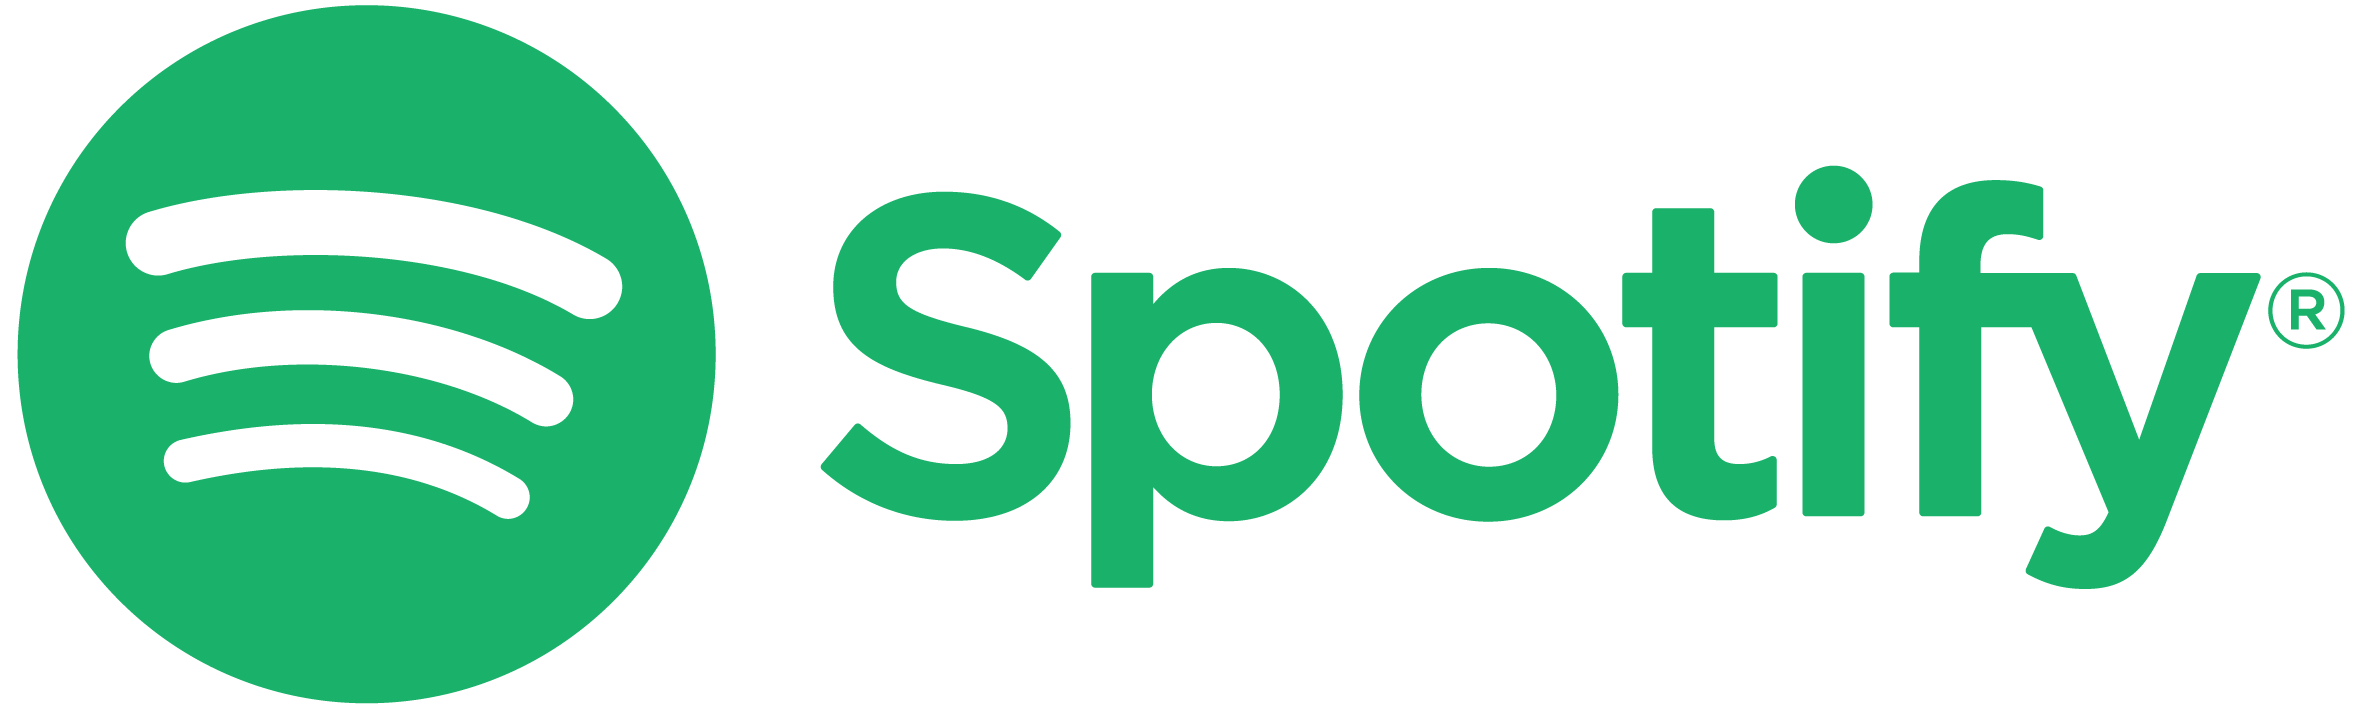
A música é uma parte intrínseca da vida cotidiana, e o Spotify, uma das principais plataformas de streaming musical, desempenha um papel significativo na maneira como consumimos e descobrimos novas faixas. Por trás dessa experiência musical aparentemente simples, existe uma complexa estrutura de algoritmos e análises de dados que alimentam o processo de recomendação de músicas personalizadas.

Neste projeto de EDA, embarcaremos em uma jornada fascinante para desvendar os segredos por trás do sistema de recomendação do Spotify. Exploraremos os dados relacionados à música e ao comportamento do usuário para entender como as recomendações são geradas e como podemos melhorá-las.


Analise de algumas métricas estatísticas de colunas de tipo numérico

In [3]:
df_musica.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
count,683438.000000,6.834380e+05,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000,683438.000000
mean,26.902661,2.362013e+05,0.053553,0.555712,0.519170,5.202658,-10.751982,0.657082,0.114223,0.484668,0.127055,0.216944,0.532798,117.212163,3.859055,1987.510692
std,19.148326,1.544409e+05,0.225133,0.175954,0.260552,3.512816,5.588169,0.474685,0.190676,0.357440,0.281489,0.185839,0.264152,29.948220,0.505612,24.185682
min,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,10.000000,1.730930e+05,0.000000,0.437000,0.307000,2.000000,-13.728000,0.000000,0.035100,0.119000,0.000000,0.099200,0.320000,94.088000,4.000000,1970.000000
50%,26.000000,2.150530e+05,0.000000,0.573000,0.526000,5.000000,-9.590000,1.000000,0.046200,0.482000,0.000029,0.141000,0.543000,115.820000,4.000000,1992.000000
75%,41.000000,2.682530e+05,0.000000,0.687000,0.733000,8.000000,-6.598000,1.000000,0.084400,0.840000,0.016200,0.282000,0.755000,135.479000,4.000000,2008.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,2021.000000


Alguns pontos interessantes que podemos tirar desses dados:
* A música mais antiga do conjunto de dados é de 1900
* A música com menor duração do conjunto de dados é de 4 segundos e a mais longa é de 5621 segudos(93,68 minutos)
* A métrica musical loudness(sonoridade) é a única do conjunto de dados que apresenta valores negativos

## Top 10 Músicas mais populares

Text(0.5, 0, 'Popularidade')

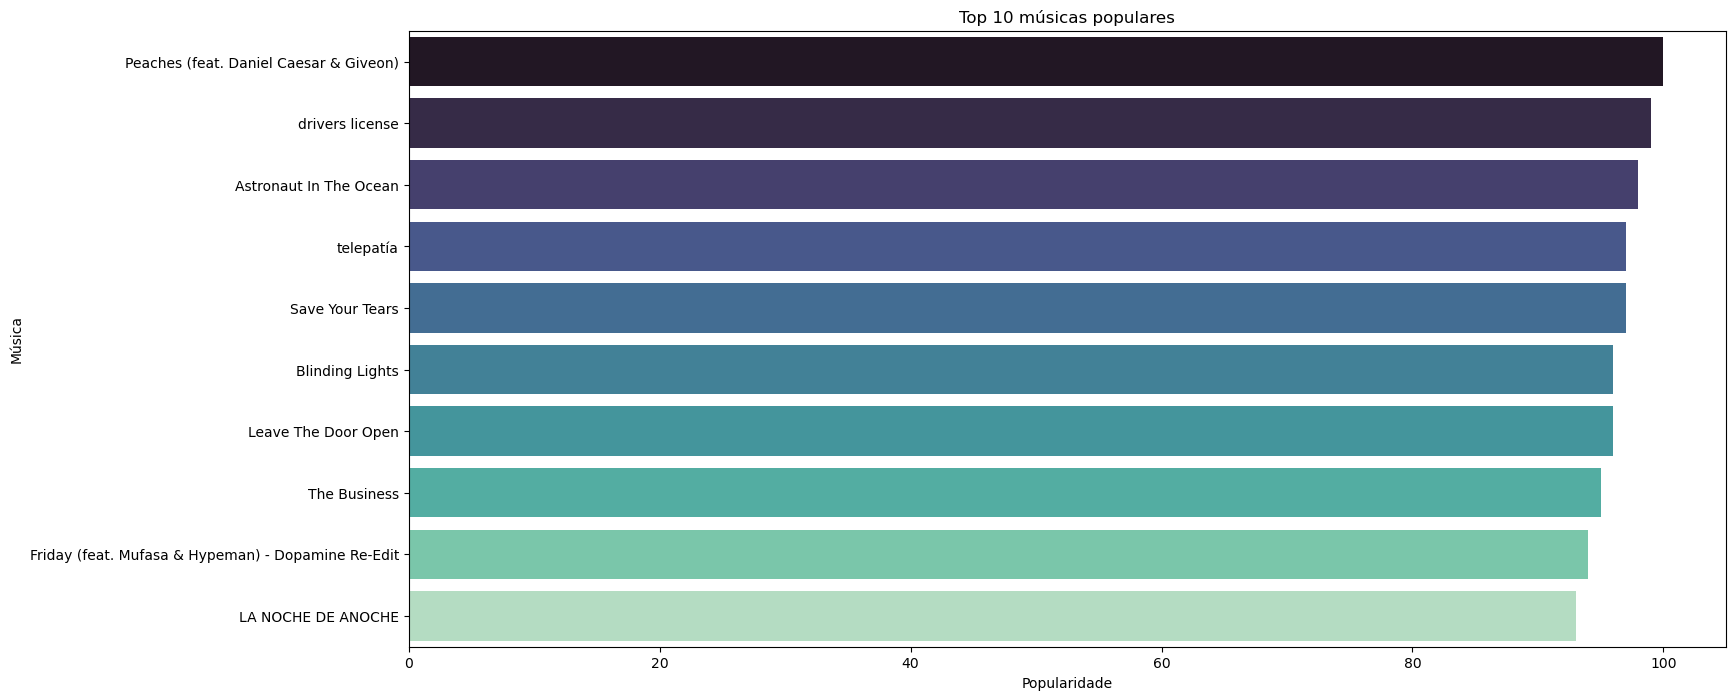

In [4]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (17,8))
df_popular = df_musica.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=df_popular,y=df_popular.index,palette="mako",orient = 'h')
axis.set_title('Top 10 músicas populares')
axis.set_ylabel('Música')
axis.set_xlabel('Popularidade')


## Top 10 artistas mais populares

Text(0.5, 0, 'Popularidade')

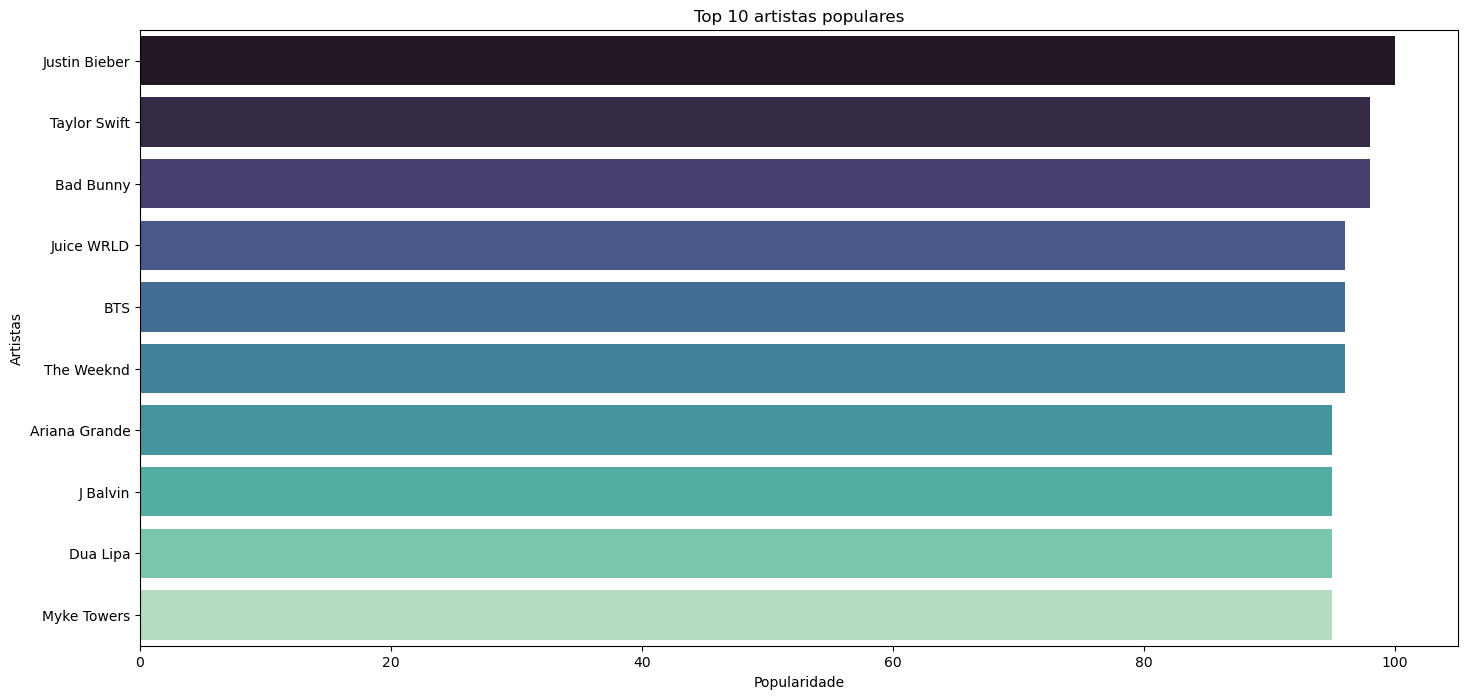

In [5]:

fig, axis = plt.subplots(figsize = (17,8))
df_popular_artista = df_artista.groupby('name_artist')['Artist_popularity'].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=df_popular_artista,y=df_popular_artista.index,palette="mako",orient = 'h')
axis.set_title('Top 10 artistas populares')
axis.set_ylabel('Artistas')
axis.set_xlabel('Popularidade')

## Top 10 artistas com mais seguidores

Text(0.5, 0, 'Número de seguidores')

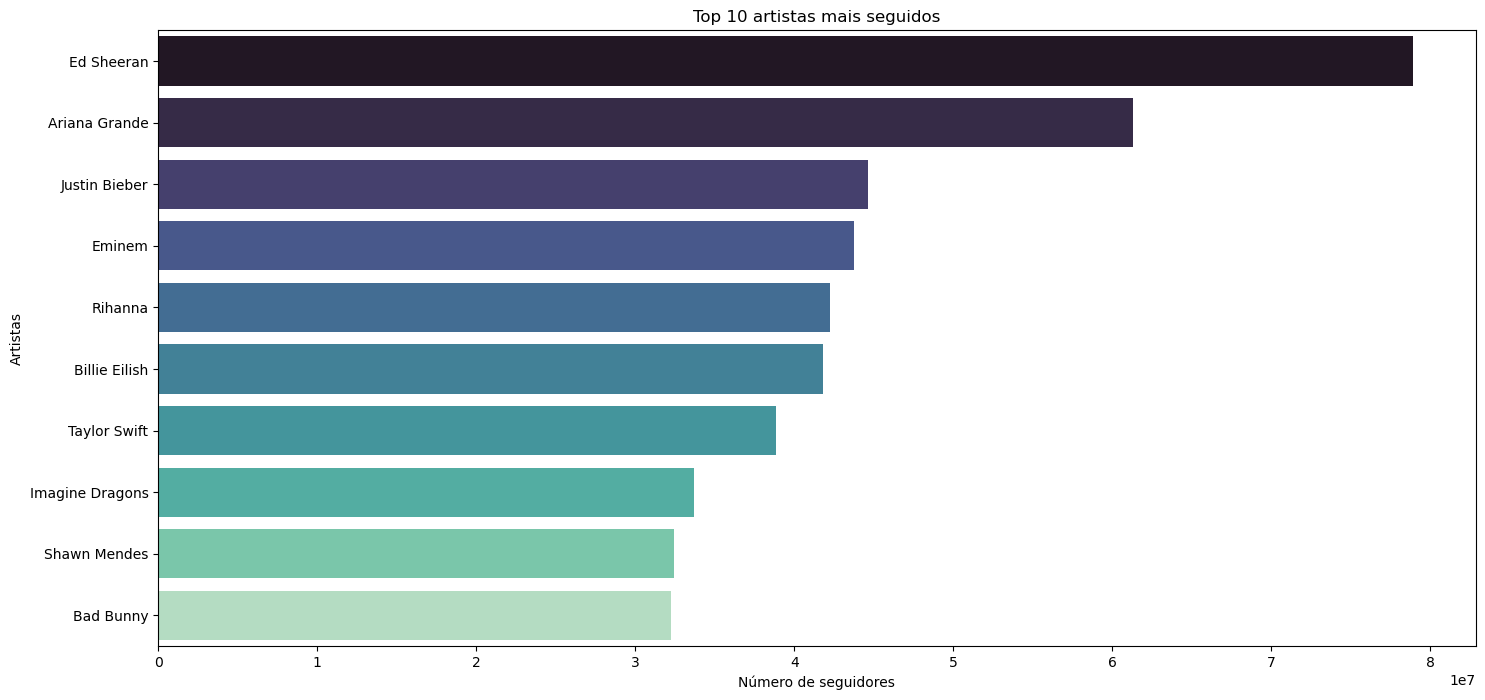

In [6]:
fig, axis = plt.subplots(figsize = (17,8))
df_popular_artista = df_artista.groupby('name_artist')['followers'].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=df_popular_artista,y=df_popular_artista.index,palette="mako",orient = 'h')
axis.set_title('Top 10 artistas mais seguidos')
axis.set_ylabel('Artistas')
axis.set_xlabel('Número de seguidores')

Ao comparar os dois gráficos, fica evidente que o número de seguidores não se correlaciona diretamente com a popularidade de um artista na plataforma. Isso fica evidenciado pelo fato de que existem casos de artistas que estão no top 10 de seguidores, mas não aparecem no top 10 de popularidade, e vice-versa. Um ponto de destaque é o artista com o maior número de seguidores,Ed Sheeran no topo da lista, que não aparece no top 10 artistas com mais popularidades. Essas discrepâncias apontam para a complexidade das dinâmicas de popularidade na plataforma, que vão além da simples contagem de seguidores e dependem de outros fatores e métricas para determinar a posição de um artista.

## Métricas músicais conforme o tempo

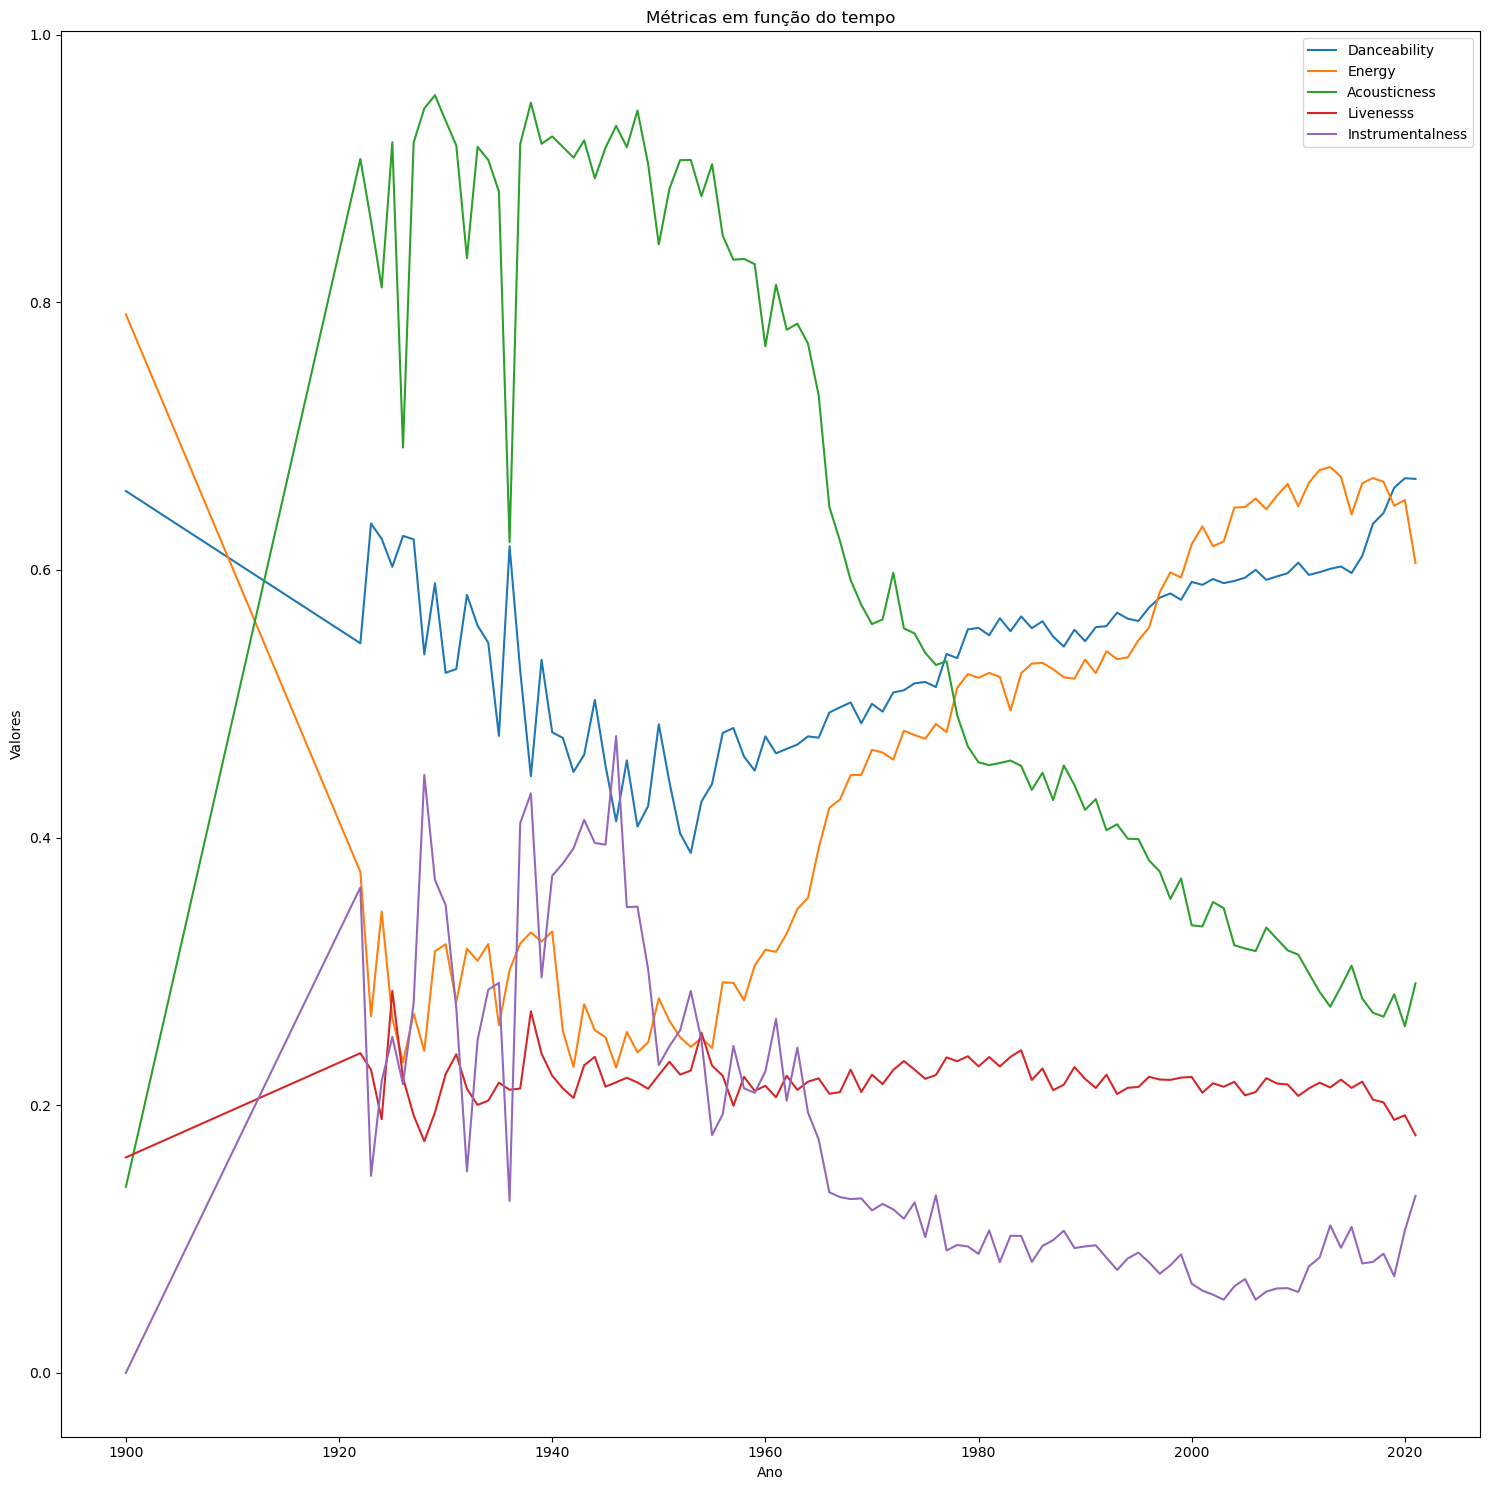

In [7]:
df_danceability = df_musica.groupby('release_year')['danceability'].mean()
df_energy = df_musica.groupby('release_year')['energy'].mean()
df_acousticness = df_musica.groupby('release_year')['acousticness'].mean()
df_inst = df_musica.groupby('release_year')['instrumentalness'].mean()
df_live = df_musica.groupby('release_year')['liveness'].mean()
# Crie um gráfico de linha para todas as colunas em função do tempo
plt.figure(figsize=(15, 15))
plt.plot(df_danceability.index, df_danceability, label='Danceability')
plt.plot(df_energy.index, df_energy, label='Energy')
plt.plot(df_acousticness.index, df_acousticness, label='Acousticness')
plt.plot(df_live.index, df_live, label='Livenesss')
plt.plot(df_inst.index, df_inst, label='Instrumentalness')
# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Métricas em função do tempo')
plt.legend()

# Mostra o gráfico
plt.tight_layout()
plt.show()


A partir deste gráfico, podemos observar como as métricas de som evoluíram ao longo do tempo. É notável que algumas métricas permaneceram consideravelmente estáveis, como Liveness e Danceability, mantendo-se consistentes ao longo do período analisado. Por outro lado, o Acousticness destaca-se como a métrica que experimentou as maiores flutuações ao longo do tempo, indicando uma maior variabilidade em sua tendência.

## Nuvem de imagens gêneros músicais

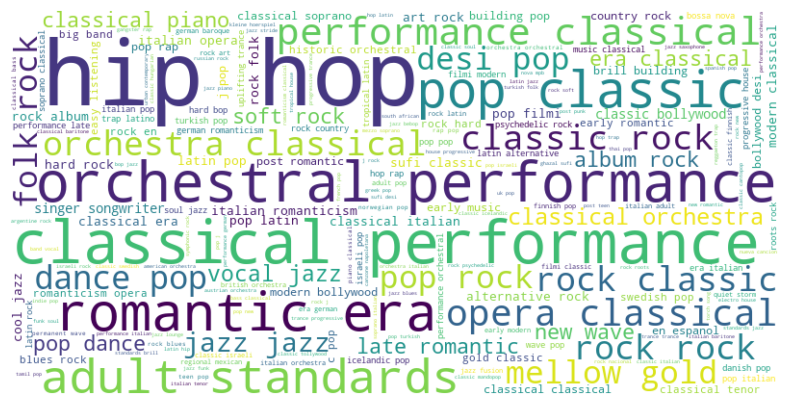

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto = df_musica['genres'].str.cat(sep=', ').replace("[", "").replace("]", "").replace("'","").replace("não atribuido","")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remova os eixos
plt.show()


 Do gráfico de gêneros músicais, percebe-se que o gênero musical 'pop' ocupa uma posição proeminente em termos de visibilidade, pois além de apareceber em um tamanho considerável na nuvem de palavras, ela aparece de várias formas diferentes de forma a englobar todas as suas vertentes musicais. A mesma analise pode ser feita para o rock.

## Correlações métricas x popularidade

C:\Users\ryosa\AppData\Local\Temp\ipykernel_3408\2009100862.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_musica.corr()


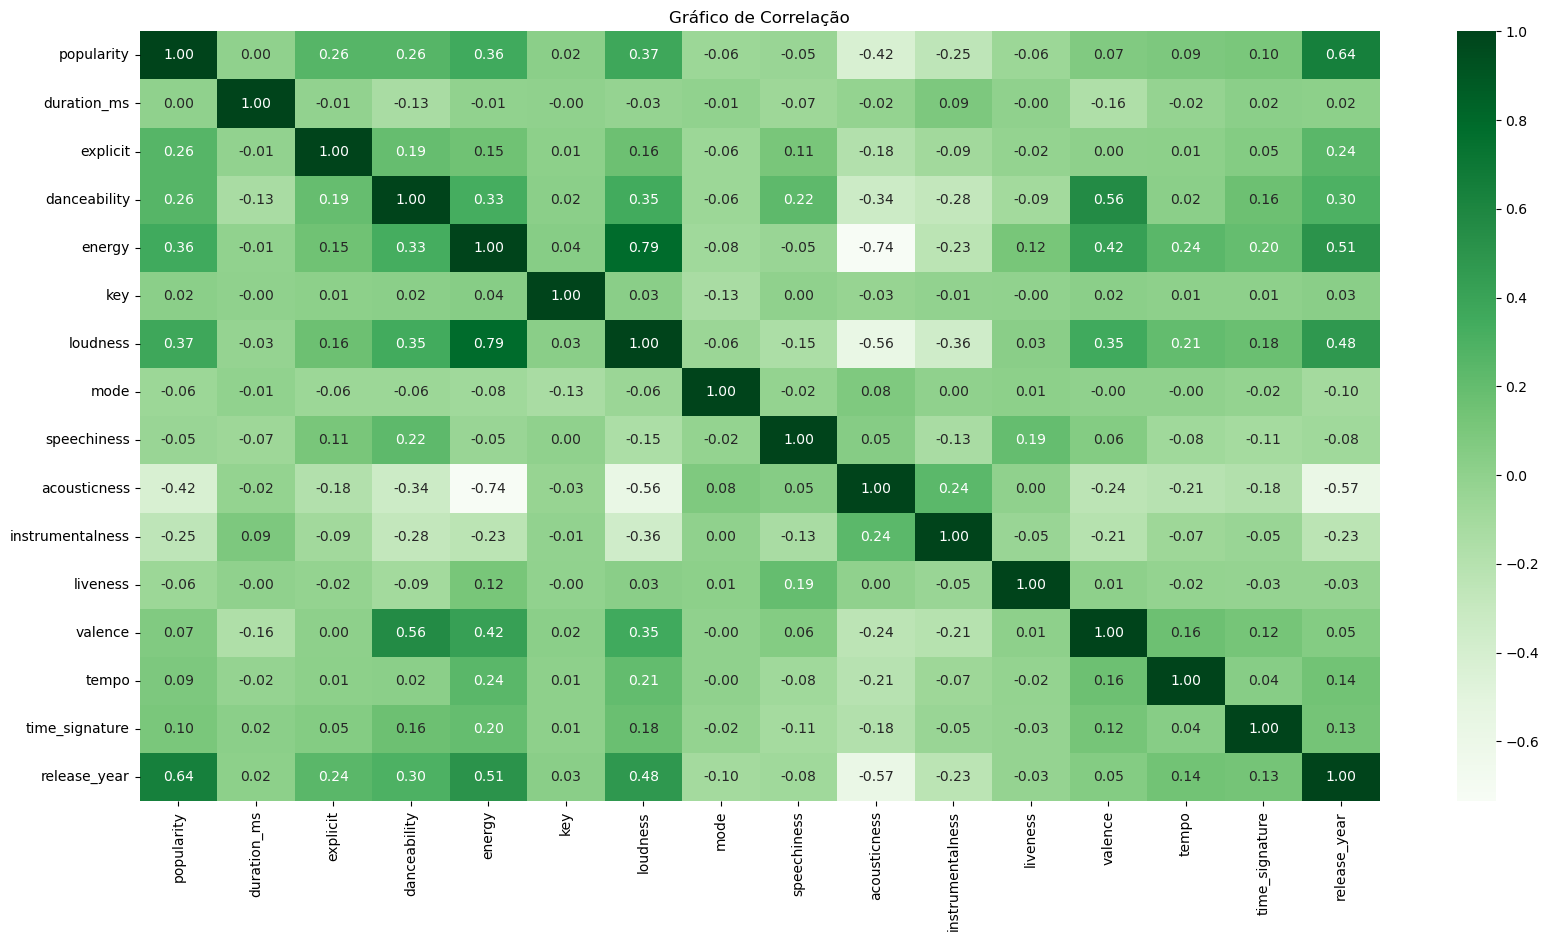

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame com as variáveis que deseja correlacionar
# Substitua df pelo seu DataFrame
correlation_matrix = df_musica.corr()

# Crie um gráfico de correlação usando seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title('Gráfico de Correlação')
plt.show()


Do mapa de calor, verifica-se que o ano de lançamento tem alta correlação com a popularidade, o que era esperado, uma vez que as músicas mais famosas são do estilo pop, que são as mais recentes. Outro ponto interessante é a alta correlação entre as métricas de barulho ou agitação("loudness") e energy("energia"), o que faz sentido uma vez que é normal remeter uma música mais barulhenta, ou agitada com maior energia.

# Modelo de recomendação de músicas

O modelo de recomendação a ser utilizado é o Nearest Neighbors (Vizinhos Mais Próximos) não supervisionado. Neste modelo, os atributos são representados como vetores, e a recomendação é feita com base na similaridade entre esses vetores, utilizando o cosseno como medida de similaridade.

Em outras palavras, cada item (neste caso, músicas) é representado como um vetor de características numéricas. Quando um usuário faz uma consulta ou escolhe um item de análise, o modelo encontra os itens mais semelhantes com base na proximidade dos vetores no espaço de características. Esses itens mais semelhantes são então recomendados ao usuário.

Essa abordagem é eficaz para recomendações, pois permite encontrar itens similares com base em suas características, sem a necessidade de treinamento supervisionado. É uma técnica de filtragem colaborativa que utiliza apenas a estrutura dos dados e a similaridade entre os itens para fazer recomendações aos usuários.

## Seleção dos dados
 Para a recomendação das músicas serão utilizadas apenas as 10000 músicas mais famosas, medido a partir da coluna de "popularity"

In [33]:
df_musica_modelo = df_musica.sort_values(by=['popularity'], ascending=False).head(10000).reset_index()

In [34]:
df_musica_modelo.head()

,index,id,name,popularity,duration_ms,explicit,release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,genres,name_artist
0,422990,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,2021-03-19,0.677,0.696,0,...,0.1190,0.321,0.000000,0.420,0.464,90.030,4,2021,"canadian pop,canadian contemporary r&b,r&b,pop...",Justin Bieber
1,422992,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,2021-03-19,0.677,0.696,0,...,0.1190,0.321,0.000000,0.420,0.464,90.030,4,2021,"canadian pop,canadian contemporary r&b,r&b,pop...",Giveon
2,422991,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,2021-03-19,0.677,0.696,0,...,0.1190,0.321,0.000000,0.420,0.464,90.030,4,2021,"canadian pop,canadian contemporary r&b,r&b,pop...",Daniel Caesar
3,663493,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,2021-01-08,0.585,0.436,10,...,0.0601,0.721,0.000013,0.105,0.132,143.874,4,2021,"post-teen pop,pop",Olivia Rodrigo
4,309610,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,2021-01-06,0.778,0.695,4,...,0.0913,0.175,0.000000,0.150,0.472,149.996,4,2021,australian hip hop,Masked Wolf


## Seleção dos atributos a ser utilizado no modelo
São pego os atributos que serão utilizados para fazer a recomendação e esses são passados para formato matriz

In [35]:
# Escolha dos atributos que será utilizado no modelo
atributos = df_musica_modelo[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].to_numpy()

array([[6.77000e-01, 6.96000e-01, 0.00000e+00, ..., 4.20000e-01,
        4.64000e-01, 9.00300e+01],
       [6.77000e-01, 6.96000e-01, 0.00000e+00, ..., 4.20000e-01,
        4.64000e-01, 9.00300e+01],
       [6.77000e-01, 6.96000e-01, 0.00000e+00, ..., 4.20000e-01,
        4.64000e-01, 9.00300e+01],
       ...,
       [6.60000e-01, 4.49000e-01, 7.00000e+00, ..., 1.11000e-01,
        2.37000e-01, 1.33984e+02],
       [7.48000e-01, 9.61000e-01, 8.00000e+00, ..., 1.75000e-01,
        8.56000e-01, 1.16037e+02],
       [6.03000e-01, 9.18000e-01, 4.00000e+00, ..., 2.84000e-01,
        4.52000e-01, 1.02473e+02]])

In [68]:
# Função para fazer recomendações de músicas para um usuário
def recommend_songs(musica, k=6):
    # Encontre as k músicas mais similares à música de referência, aplica a metrica de similaridade de cossenos
    neighbors = NearestNeighbors(n_neighbors=k, metric='cosine')
    # Alimenta o modelo com os dados selecionados
    neighbors.fit(atributos)
    # Seleciona o vetor da música pedida
    music_vector=df_musica_modelo[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].loc[df_musica_modelo['name']==musica].to_numpy()
    distances, indices = neighbors.kneighbors(music_vector) 
    # Retorna as 5 músicas mais parecidas
    return df_musica_modelo.iloc[indices.flatten()[1:]]

# Output
Teste com a música drivers license

In [70]:
recommend_songs("drivers license")

,index,id,name,popularity,duration_ms,explicit,release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,genres,name_artist
1140,327409,3bNv3VuUOKgrf5hu3YcuRo,Someone Like You,80,285240,0,2011-01-24,0.556,0.319,9,...,0.0281,0.893,0.0,0.0996,0.294,135.187,4,2011,"british soul,pop,pop soul,uk pop",Adele
5158,90892,0xG0SHshCStMEyNbNC5d4k,Issues,73,176320,0,2017-07-28,0.670,0.415,8,...,0.0786,0.390,0.0,0.0617,0.445,114.212,4,2017,"alt z,electropop,pop,dance pop,post-teen pop",Julia Michaels
9227,138857,1Tt7zr1yDbKbT8L4jzSZ74,When I Am Older,70,111452,0,2019-11-15,0.730,0.326,8,...,0.2600,0.705,0.0,0.1030,0.434,116.893,4,2019,"show tunes,movie tunes,hollywood",Josh Gad
7554,272680,2yQZwi1P8AkkxxFhQ8rMEK,Greatest Love Story,71,222573,0,2018-01-19,0.669,0.617,10,...,0.0570,0.401,0.0,0.1190,0.621,147.992,4,2018,"contemporary country,country pop",LANCO
172,317137,3U4isOIWM3VvDubwSI3y7a,All of Me,87,269560,0,2013-08-30,0.422,0.264,8,...,0.0322,0.922,0.0,0.1320,0.331,119.930,4,2013,"neo soul,pop soul,r&b,urban contemporary,pop",John Legend


# Conclusão

Foi criado um notebook passo a passo para implementar um sistema de recomendação de músicas personalizado para o Spotify, usando o método de "Nearest Neighbors". Este modelo, embora funcional, representa apenas o ponto de partida para um sistema de recomendação mais sofisticado e eficaz.

Existem várias maneiras de aprimorar e expandir esse sistema no futuro. Algumas áreas de melhoria incluem:

1.Filtro de Avaliação de Usuários: Atualmente, o modelo Nearest Neighbors não leva em consideração as avaliações dos usuários. Implementar um sistema de classificação e incorporar preferências de usuários pode melhorar significativamente a precisão das recomendações.

2.Utilização de Outros Atributos: Além das características musicais, há muitos outros atributos que podem ser explorados, como informações do artista, letras de músicas, dados de histórico de audição do usuário, etc. A inclusão de atributos adicionais pode enriquecer o modelo e fornecer recomendações mais personalizadas.

3.Afinamento de Hiperparâmetros: O desempenho do modelo pode ser otimizado ajustando hiperparâmetros, como o número de vizinhos mais próximos (k) e a medida de similaridade usada. Experimentar diferentes configurações pode levar a resultados mais precisos.